In [1]:
from logicqubit.logic import *

logicqubit-gpu version 1.2.6


In [2]:
# Uf|x,y> = |x,y+f(x)>
# Uf|x>(|0>-|1>) = |x>|0+f(x)>+|x>|1+f(x)>
# p/ f(x)=0 -> |x,y>, f(x)=1 -> -1|x,y>
# = (-1)^f(x)|x,y>

def qft(qr, n):
    for i in range(n):
        for j in range(i):
            logicQuBit.CU1(qr[j], qr[i], pi/float(2**(i-j)))
        logicQuBit.H(qr[i])
        
def iqft(qr, n): # transformada quântica de Fourier inversa
    for i in range(n):
        for j in range(i):
            logicQuBit.CU1(qr[j], qr[i], -pi/float(2**(i-j)))
        logicQuBit.H(qr[i])
        
def swap(s1, s2):
    logicQuBit.CX(s1, s2)
    logicQuBit.CX(s2, s1)
    logicQuBit.CX(s1, s2)

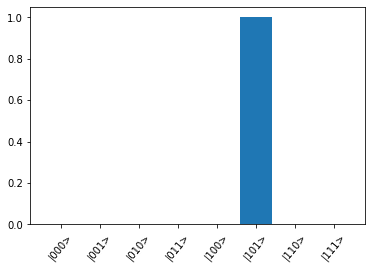

In [5]:
logicQuBit  = LogicQuBit(4)

x1 = Qubit()
x2 = Qubit()
x3 = Qubit()
y = Qubit()

# |000>+|001>+|010>+|011>+|100>+|101>+|110>+|111>
x1.H()
x2.H()
x3.H()

# (|0>-|1>)
y.X()
y.H()


# oracle temp = q[4]
y.CX(x1)
#y.CX(x2)
y.CX(x3)


x1.H()
x2.H()
x3.H()

logicQuBit.Measure([x1,x2,x3])
logicQuBit.Plot()

In [13]:
logicQuBit  = LogicQuBit(7)

x = QubitRegister(3)
y = QubitRegister(4)

# truth table
# x   - y
# 000 - 0001
# 001 - 0111
# 010 - 0100
# 011 - 1101
# 100 - 0001
# 101 - 0111
# 110 - 0100
# 111 - 1011

# |Hx,y> = (|000,0000>+|001,0000>+|010,0000>+|011,0000>+|100,0000>+|101,0000>+|110,0000>+|111,0000>)
x.H()

# |psi> = |x>|y> = |x>|0000>

# x=000 - y=0001, pois não houve outra operação
# X(y1) (|000,0001>+|001,0001>+|010,0001>+|011,0001>+|100,0001>+|101,0001>+|110,0001>+|111,0001>)
y[1].X()

# x=001 - y=0111
# y3.CX(x2) (|000,0001>+|001,0001>+|010,0101>+|011,0101>+|100,0001>+|101,0001>+|110,0101>+|111,0101>)
y[3].CX(x[2])
# y2.CX(x2) (|000,0001>+|001,0001>+|010,0111>+|011,0111>+|100,0001>+|101,0001>+|110,0111>+|111,0111>)
y[2].CX(x[2])

# x=010 - y=0100
# y3.CX(x3) (|000,0001>+|001,0001>+|010,0111>+|011,0111>+|100,0101>+|101,0101>+|110,0011>+|111,0011>)
y[3].CX(x[3])
# y1.CX(x3) (|000,0001>+|001,0001>+|010,0111>+|011,0111>+|100,0100>+|101,0100>+|110,0010>+|111,0010>)
y[1].CX(x[3])

# x=011 - y=1101
# y4.CCX(x3,x2) (|000,0001>+|001,0001>+|010,0111>+|011,0111>+|100,0100>+|101,0100>+|110,1010>+|111,1010>)
y[4].CCX(x[3], x[2])

# y3.CCX(x3,x2) (|000,0001>+|001,0001>+|010,0111>+|011,0111>+|100,0100>+|101,0100>+|110,1110>+|111,1110>)
y[3].CCX(x[3], x[2])
# y2.CCX(x3,x2) (|000,0001>+|001,0001>+|010,0111>+|011,0111>+|100,0100>+|101,0100>+|110,1100>+|111,1100>)
y[2].CCX(x[3], x[2])
# y1.CCX(x3,x2) (|000,0001>+|001,0001>+|010,0111>+|011,0111>+|100,0100>+|101,0100>+|110,1101>+|111,1101>)
y[1].CCX(x[3], x[2])

# |0001>(|000>+|001>) + |0111>(|010>+|011>) + |0100>(|100>+|101>) + |1101>(|110>+|111>) 

qft([x[1],x[2],x[3]],3)
#swap(x[1],x[3])

logicQuBit.PrintState()

<IPython.core.display.Math object>

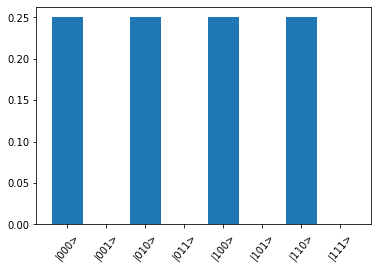

[0.24999999999999978, 9.682320048931733e-38, 0.24999999999999978, 9.682320048931733e-38, 0.24999999999999978, 9.682320048931733e-38, 0.24999999999999978, 9.682320048931733e-38]


In [14]:
#res = logicQuBit.Measure([y[1],y[2],y[3],y[4]])
res = logicQuBit.Measure([x[1],x[2],x[3]])
logicQuBit.Plot()
print(res)